https://www.kaggle.com/datasets/phylake1337/fire-dataset

Файлы необходимо поместить в папку `data`

In [3]:
import pandas as pd

from PIL import Image
import io
import os
import numpy as np

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

GPU is available


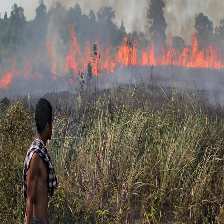

In [9]:
img = tf.keras.utils.load_img(
    path="./data/fire_images/fire.1.png",
    color_mode='rgb',
    target_size=(224,224,3)    
)
img

In [12]:
tf.keras.utils.img_to_array(img)

array([[[205., 209., 208.],
        [205., 209., 208.],
        [204., 208., 207.],
        ...,
        [166., 158., 145.],
        [168., 165., 150.],
        [168., 165., 150.]],

       [[205., 209., 208.],
        [206., 210., 209.],
        [204., 208., 207.],
        ...,
        [167., 159., 146.],
        [168., 165., 150.],
        [169., 163., 149.]],

       [[203., 207., 206.],
        [204., 208., 207.],
        [204., 208., 207.],
        ...,
        [170., 162., 149.],
        [170., 167., 152.],
        [173., 165., 152.]],

       ...,

       [[ 68.,  55.,  46.],
        [ 72.,  56.,  43.],
        [ 45.,  35.,  23.],
        ...,
        [ 79.,  56.,  38.],
        [ 97.,  76.,  47.],
        [ 73.,  54.,  24.]],

       [[ 49.,  40.,  23.],
        [ 89.,  71.,  47.],
        [ 92.,  75.,  49.],
        ...,
        [ 92.,  70.,  47.],
        [ 98.,  87.,  57.],
        [122.,  97.,  77.]],

       [[ 65.,  55.,  45.],
        [ 82.,  63.,  46.],
        [123.,  

In [41]:
path = "data"

train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = path,
    validation_split = 0.2,
    subset='training',
    seed=906,
    image_size=(224,224),
    batch_size=16
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    directory = path,
    validation_split = 0.2,
    subset='validation',
    seed=906,
    image_size=(224,224),
    batch_size=16
)

class_names = train_ds.class_names
print(class_names)

# Разбивка на train/test
X_train, y_train = [], []
for images, labels in train_ds:
    X_train.extend(images.numpy())
    y_train.extend(labels.numpy())

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test, y_test = [], []
for images, labels in val_ds:
    X_test.extend(images.numpy())
    y_test.extend(labels.numpy())

X_test = np.array(X_test)
y_test = np.array(y_test)

# Проверка размерности данных
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Found 977 files belonging to 2 classes.
Using 782 files for training.
Found 977 files belonging to 2 classes.
Using 195 files for validation.
['fire_images', 'non_fire_images']


2024-04-22 17:46:26.302790: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Shape of X_train: (782, 224, 224, 3)
Shape of y_train: (782,)
Shape of X_test: (195, 224, 224, 3)
Shape of y_test: (195,)


2024-04-22 17:46:27.467899: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Тип: non_fire_images


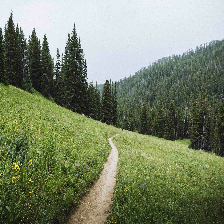

In [42]:
num = 213 # Рандомный номер
print(f"Тип: {train_ds.class_names[y_train[num]]}") # Выведем породу
tf.keras.utils.array_to_img(X_train[num]) # Выведем изображение животного

In [43]:
num_classes = len(val_ds.class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=X_train[0].shape),
  # tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=2e-4),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy'])

model.summary(show_trainable=True)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ conv2d_3 (Conv2D)           │ (None, 222, 222, 32)  │        896 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ max_pooling2d_3             │ (None, 111, 111, 32)  │          0 │   -   │
│ (MaxPooling2D)              │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d_4 (Conv2D)           │ (None, 109, 109, 32)  │      9,248 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ max_pooling2d_4             │ (None, 54, 54, 32)    │          0 │   -   │
│ (MaxPooling2D)              │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d_5 (Conv2D)           │ (None, 52, 52, 32)    │      9,248 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ max_pooling2d_5             │ (None, 26, 26, 32)    │          0 │   -   │
│ (MaxPooling2D)              │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ flatten_1 (Flatten)         │ (None, 21632)         │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_4 (Dense)             │ (None, 128)           │  2,769,024 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ batch_normalization_1       │ (None, 128)           │        512 │   Y   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_5 (Dense)             │ (None, 64)            │      8,256 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_6 (Dense)             │ (None, 32)            │      2,080 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dropout_1 (Dropout)         │ (None, 32)            │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_7 (Dense)             │ (None, 2)             │         66 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 2,799,330 (10.68 MB)

 Trainable params: 2,799,074 (10.68 MB)

 Non-trainable params: 256 (1.00 KB)

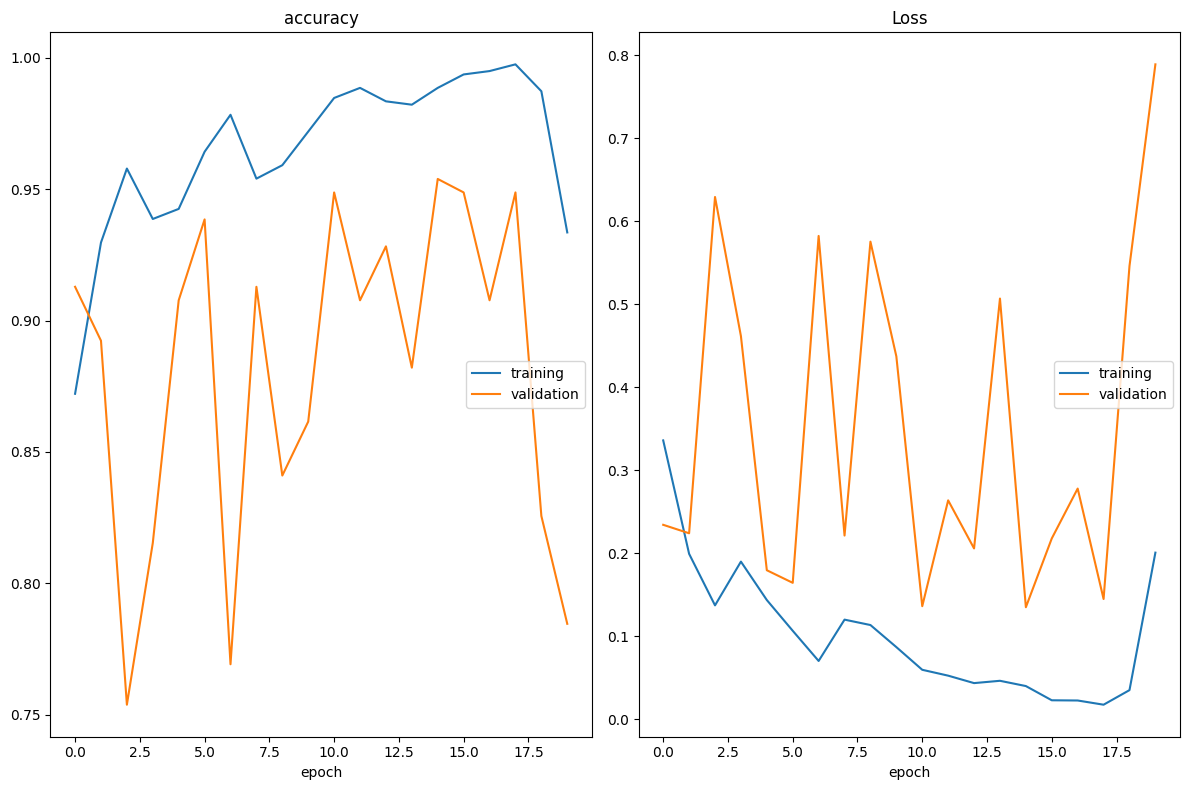

accuracy
	training         	 (min:    0.872, max:    0.997, cur:    0.934)
	validation       	 (min:    0.754, max:    0.954, cur:    0.785)
Loss
	training         	 (min:    0.018, max:    0.336, cur:    0.201)
	validation       	 (min:    0.135, max:    0.789, cur:    0.789)
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.9462 - loss: 0.1664 - val_accuracy: 0.7846 - val_loss: 0.7891


In [44]:
from tensorflow.keras.callbacks import EarlyStopping
from livelossplot.inputs.keras import PlotLossesCallback

plot_loss = PlotLossesCallback()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, mode='min')
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")

hist = model.fit(
  X_train,
  y_train,
  validation_data=(X_test, y_test),
  epochs=20,
  batch_size=8,
  verbose=1,
  callbacks=[early_stopping, plot_loss, tensorboard_callback]
)

In [45]:
predicted_classes = model.predict(X_test)
predicted_classes = np.argmax(predicted_classes, axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step


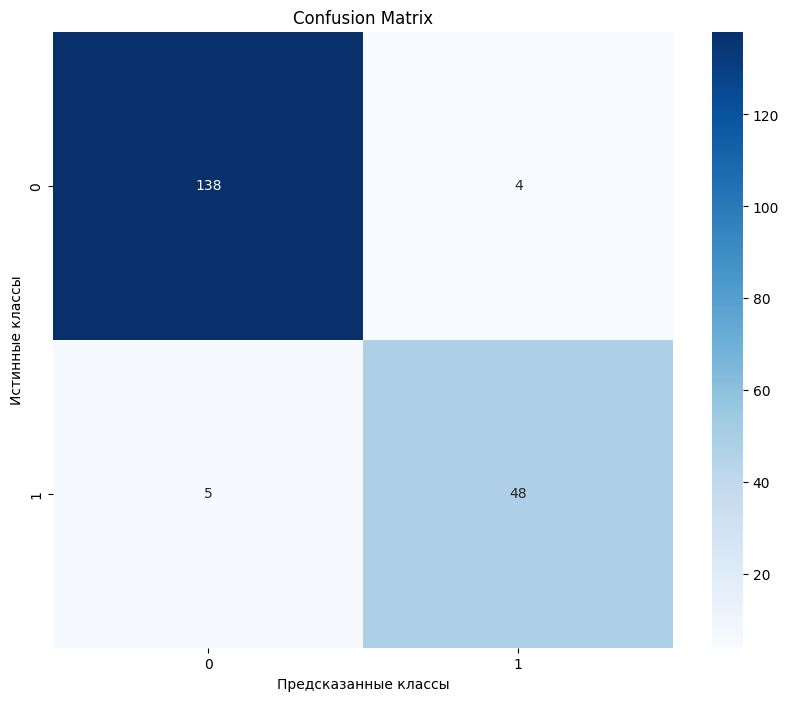

Accuracy: 0.95
Precision: 0.92
Recall: 0.91


In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)

# Отображение confusion matrix с использованием seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Confusion Matrix')
plt.show()



print(f"Accuracy: {accuracy_score(y_test, predicted_classes):.2f}")
print(f"Precision: {precision_score(y_test, predicted_classes):.2f}")
print(f"Recall: {recall_score(y_test, predicted_classes):.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step
Rkfcc:
fire_images # 0

Предсказанный класс моделью:
fire_images # 0


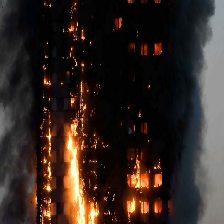

In [49]:
num = 17 # Рандомный номер
predicted_breed = model.predict(np.expand_dims(X_test[num], axis=0)) # Предсказываем моделью вероятности
predicted_breed = np.argmax(predicted_breed) # Вытаскиваем наиболее вероятную породу

print(f"Rkfcc:\n{class_names[y_test[num]]} # {y_test[num]}") # Выведем породу истинную
print(f"\nПредсказанный класс моделью:\n{class_names[predicted_breed]} # {predicted_breed}") # Выведем породу предсказанную
tf.keras.utils.array_to_img(X_test[num]) # Выведем изображение животного

# Предикт изображения из папки

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted class: fire_images


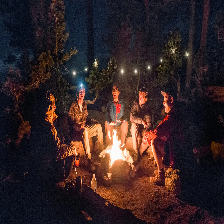

In [50]:
from tensorflow.keras.preprocessing import image

img_path = "Campfire-Safety-4-of-4-scaled.png"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) # изображение в тензор
img_array = np.expand_dims(img_array, axis=0) # добавляем размерность к тензору

predicted_breed = model.predict(img_array)
predicted_breed = np.argmax(predicted_breed)

# Название предсказанного класса
print("Predicted class:", class_names[predicted_breed])
img

In [108]:
list()

[(0, 'fire.621.png'),
 (1, 'fire.308.png'),
 (2, 'fire.736.png'),
 (3, 'fire.1.png'),
 (4, 'fire.97.png')]

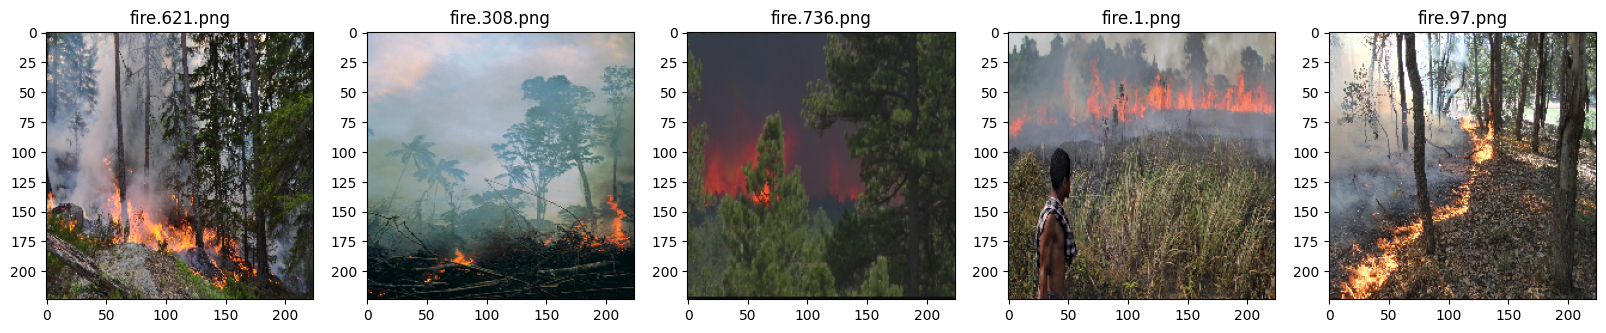

In [114]:
# Что модель распознала неверно
not_rec = []
for img in os.listdir("./data/fire_images"):
    im = image.load_img(os.path.join("./data/fire_images", img), target_size=(224, 224))
    im = image.img_to_array(im)
    img_array = np.expand_dims(im, axis=0)

    y_pred = model.predict(img_array, verbose=0)
    y_pred = np.argmax(y_pred)


    if y_pred == 1:
        not_rec.append(img)
        # print(img)
        # resized = image.load_img(os.path.join("./data/fire_images", img), target_size=(224, 224))
        # plt.imshow(resized)
        # plt.show()

fig, ax = plt.subplots(ncols=len(not_rec), figsize=(20,20))
for idx, img in enumerate(not_rec):
    img = image.load_img(os.path.join("./data/fire_images", img), target_size=(224, 224))
    ax[idx].imshow(img)
    ax[idx].title.set_text(not_rec[idx])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted class: non_fire_images


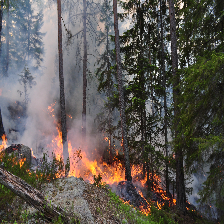

In [119]:
from tensorflow.keras.preprocessing import image

img_path = not_rec[0]
img = image.load_img(os.path.join("./data/fire_images", img_path), target_size=(224, 224))
img_array = image.img_to_array(img) # изображение в тензор
img_array = np.expand_dims(img_array, axis=0) # добавляем размерность к тензору

predicted_breed = model.predict(img_array)
predicted_breed = np.argmax(predicted_breed)

# Название предсказанного класса
print("Predicted class:", class_names[predicted_breed])
img

In [53]:
# запуск tensorboard
!tensorboard --logdir logs

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.16.2 at http://localhost:6006/ (Press CTRL+C to quit)
^C
